In [1]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
import os
import numpy as np
import pandas as pd
#load model
import pickle
os.chdir('/media/tohn/SSD/ModelTrainByImages/R2_4/models')
filename = "modelrf_fold4_15AB_5FP_1.pkl"
with open(filename, 'rb') as file:
    model = pickle.load(file)

/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/kannika/miniconda3/envs/AI/lib/python3.6/site-packages/sklearn/base.py:315: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 0.23.1 when using version 0.24.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [3]:
dataframe = pd.read_csv('/home/yupaporn/codes/USAI/FeaturesVector_Testset_15AB_fold4_1.csv')
dataframe = dataframe.drop(['Unnamed: 0'], axis=1)
dataframe

,0,1,2,3,4,5,6,7,8,9,...,2042,2043,2044,2045,2046,2047,Class,SubPosition,Views,Sub_class
0,0.151803,0.340240,-0.047575,-0.181448,0.397921,-0.156386,-0.004002,-0.185758,0.024205,-0.187401,...,-0.052901,-0.153053,0.163883,0.329265,0.146748,0.334428,Abnormal,P1,FP-A,AB01
1,0.499227,0.652975,0.129363,-0.150076,0.073134,-0.159476,0.376324,-0.048421,-0.151622,-0.210891,...,-0.064262,-0.150877,0.195832,0.308472,0.737373,0.060391,Abnormal,P2,FP-A,AB01
2,0.142933,0.413746,0.400205,-0.116640,0.301092,-0.063376,0.574817,-0.171397,-0.170839,-0.177815,...,-0.082836,-0.154250,0.171439,0.317065,0.848726,-0.141952,Abnormal,P41,FP-B,AB01
3,0.147563,0.207198,-0.063254,-0.130224,0.195097,-0.148831,0.290896,-0.134004,-0.118368,-0.125928,...,0.084355,-0.160746,0.110122,0.223170,0.504204,0.084341,Abnormal,P51,FP-C,AB01
4,-0.164141,0.134575,0.078169,-0.134333,0.083664,-0.170744,-0.129570,-0.229737,-0.178624,-0.228907,...,-0.154533,-0.142384,0.025978,-0.143081,0.196822,0.102433,Abnormal,P31,FP-B,AB01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.225110,0.520727,-0.062330,-0.168652,0.197681,0.066440,-0.103117,0.064905,1.173388,-0.084697,...,0.065597,-0.116849,-0.097760,0.052811,0.667341,0.230954,Normal,P32,FP-B,Normal
1308,-0.098667,0.109192,-0.186427,-0.101798,-0.173305,0.159007,-0.068844,0.463658,-0.090795,0.388010,...,-0.042810,0.638351,-0.072163,-0.107621,-0.184371,0.061249,Normal,P42,FP-B,Normal
1309,0.331644,0.294162,-0.006001,-0.116547,0.667485,0.158837,0.149685,-0.170426,0.052350,-0.067893,...,0.800069,0.020160,0.220583,0.770254,0.209027,0.205928,Normal,P52,FP-C,Normal
1310,0.729347,0.110863,0.028356,-0.160336,-0.042976,-0.052135,0.115037,0.048440,-0.048351,-0.147372,...,0.064275,-0.178142,-0.141125,0.700691,0.392534,0.059003,Normal,P61,FP-C,Normal


In [4]:
X_test = dataframe.iloc[:,0:2048]
y_test = dataframe.iloc[:,2050]
print(X_test.shape)
print(y_test.shape)

(1312, 2048)
(1312,)


In [5]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.151803,0.340240,-0.047575,-0.181448,0.397921,-0.156386,-0.004002,-0.185758,0.024205,-0.187401,...,-0.162971,-0.211277,0.260453,0.073518,-0.052901,-0.153053,0.163883,0.329265,0.146748,0.334428
1,0.499227,0.652975,0.129363,-0.150076,0.073134,-0.159476,0.376324,-0.048421,-0.151622,-0.210891,...,-0.140010,-0.135670,-0.014989,0.139127,-0.064262,-0.150877,0.195832,0.308472,0.737373,0.060391
2,0.142933,0.413746,0.400205,-0.116640,0.301092,-0.063376,0.574817,-0.171397,-0.170839,-0.177815,...,-0.127016,-0.174239,0.550043,-0.017000,-0.082836,-0.154250,0.171439,0.317065,0.848726,-0.141952
3,0.147563,0.207198,-0.063254,-0.130224,0.195097,-0.148831,0.290896,-0.134004,-0.118368,-0.125928,...,-0.106189,-0.183975,0.606827,-0.002606,0.084355,-0.160746,0.110122,0.223170,0.504204,0.084341
4,-0.164141,0.134575,0.078169,-0.134333,0.083664,-0.170744,-0.129570,-0.229737,-0.178624,-0.228907,...,-0.134055,-0.158645,0.372544,-0.070262,-0.154533,-0.142384,0.025978,-0.143081,0.196822,0.102433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,0.225110,0.520727,-0.062330,-0.168652,0.197681,0.066440,-0.103117,0.064905,1.173388,-0.084697,...,1.162145,-0.126673,-0.114376,0.068154,0.065597,-0.116849,-0.097760,0.052811,0.667341,0.230954
1308,-0.098667,0.109192,-0.186427,-0.101798,-0.173305,0.159007,-0.068844,0.463658,-0.090795,0.388010,...,0.518898,-0.096273,0.270510,0.196440,-0.042810,0.638351,-0.072163,-0.107621,-0.184371,0.061249
1309,0.331644,0.294162,-0.006001,-0.116547,0.667485,0.158837,0.149685,-0.170426,0.052350,-0.067893,...,0.011012,-0.182168,0.135224,0.082825,0.800069,0.020160,0.220583,0.770254,0.209027,0.205928
1310,0.729347,0.110863,0.028356,-0.160336,-0.042976,-0.052135,0.115037,0.048440,-0.048351,-0.147372,...,0.786168,-0.143422,-0.191058,0.000582,0.064275,-0.178142,-0.141125,0.700691,0.392534,0.059003


In [6]:
y_test

0       FP-A
1       FP-A
2       FP-B
3       FP-C
4       FP-B
        ... 
1307    FP-B
1308    FP-B
1309    FP-C
1310    FP-C
1311    FP-E
Name: Views, Length: 1312, dtype: object

In [7]:
y_pred = model.predict(X_test)

In [8]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))#performance

[[128  97  40   5   1]
 [ 17 344  34   1   5]
 [  3  67 280  24   0]
 [  2   5  37 152   0]
 [  0   8   8   1  53]]
              precision    recall  f1-score   support

        FP-A       0.85      0.47      0.61       271
        FP-B       0.66      0.86      0.75       401
        FP-C       0.70      0.75      0.72       374
        FP-D       0.83      0.78      0.80       196
        FP-E       0.90      0.76      0.82        70

    accuracy                           0.73      1312
   macro avg       0.79      0.72      0.74      1312
weighted avg       0.75      0.73      0.72      1312



Text(0.5, 21.5, 'Predicted label')

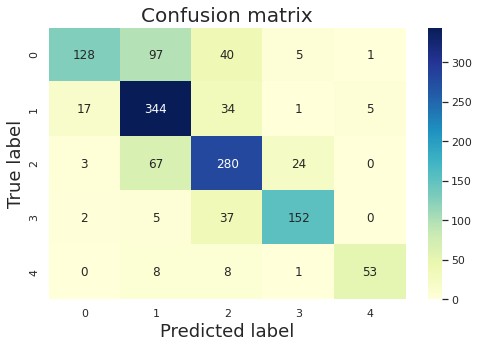

In [9]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

ax = sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)